# Seaborn

Seaborn is a visualization library that sits on top of matplotlib, making it nicer to look at and adding some extra capabilities too.

Let's start by loading up a real dataset on 2019 model-year vehicles, and plotting a histogram just using matplotlib to see the distribution by number of gears.

In [8]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['FuelEfficiency.csv']))


Saving FuelEfficiency.csv to FuelEfficiency.csv


<Axes: xlabel='# Gears'>

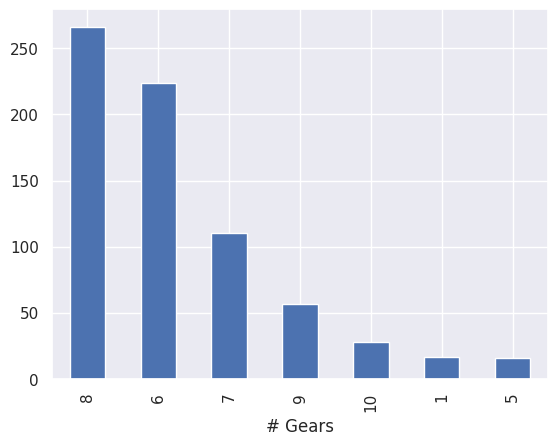

In [9]:
%matplotlib inline

import pandas as pd

df = pd.read_csv("FuelEfficiency.csv")

gear_counts = df['# Gears'].value_counts()

gear_counts.plot(kind='bar')

We can load up Seaborn, and just call set() on it to change matplotlib's default settings to something more visually pleasing.

In [10]:
import seaborn as sns
sns.set()

Now if we do the same plot command, it's a little more modern looking. Matplotlib is based on Matplot, and its visualization defaults are frankly showing their age.

<Axes: xlabel='# Gears'>

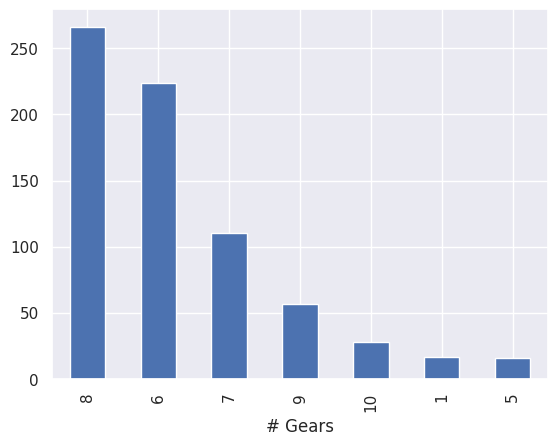

In [11]:
gear_counts.plot(kind='bar')

Let's take a closer look at the data we're dealing with.

In [12]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,Aston Martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


Seaborn includes many types of plots that matplotlib doens't offer. For example, "distplot" can be used to plot a histogram together with a smooth distribution of that histogram overlaid on it. Let's plot the distribution of MPG values on the vehicles in this database as an example:

/tmp/ipython-input-2473311932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CombMPG'])


<Axes: xlabel='CombMPG', ylabel='Density'>

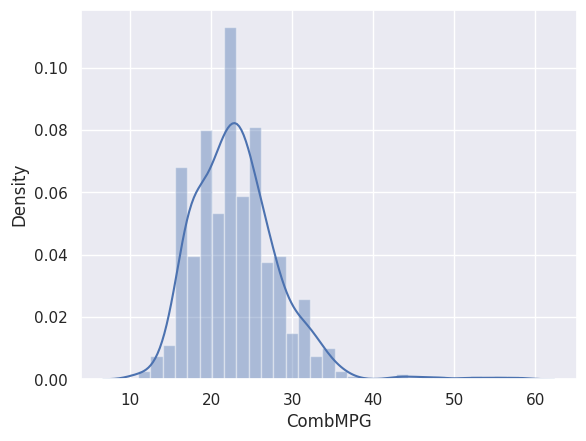

In [14]:
sns.distplot(df['CombMPG'])

Something you encounter pretty often is a "pair plot" from Seaborn. This lets you visualize plots of every combination of various attributes together, so you can look for interesting patterns between features.

As an example, let's classify cars by how many cylinders are in their engines, and look for relationships between cylinders, city MPG rating, Highway MPG rating, and combined MPG rating.

In [15]:
df2 = df[['Cylinders', 'CityMPG', 'HwyMPG', 'CombMPG']]
df2.head()

,Cylinders,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,16,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


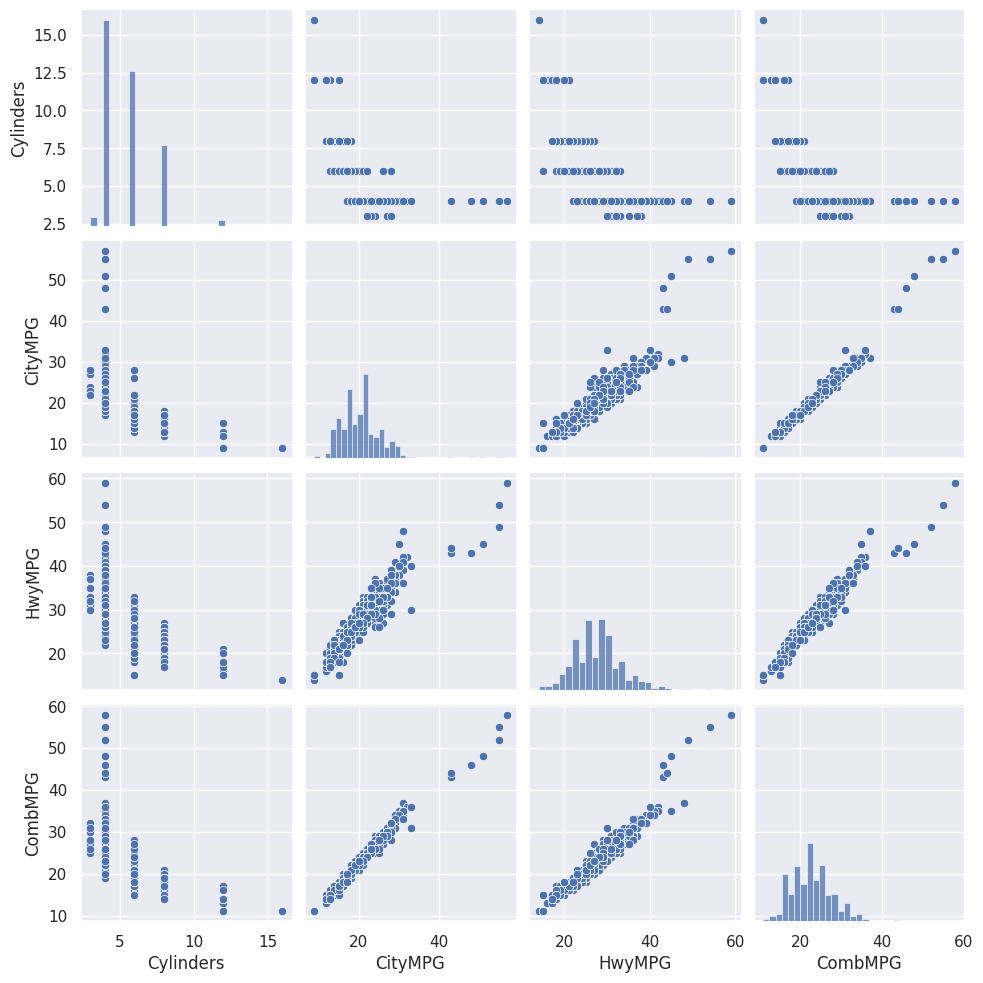

In [16]:
sns.pairplot(df2, height=2.5);  #Seaborn currently has a bug with the hue parameter so we've omitted it

By studying the results above, you can see there is a relationship between number of cylinders and MPG, but MPG for 4-cylinder vehicles ranges really widely. There also appears to be a good linear relationship between the different ways of measuring MPG values, until you get into the higher MPG ratings.

Seaborn 1.9 also includes "scatterplot", which is exactly what it sounds like. It plots individual data points across two axes of your choosing, so you can see how your data is distributed across those dimensions.

<Axes: xlabel='Eng Displ', ylabel='CombMPG'>

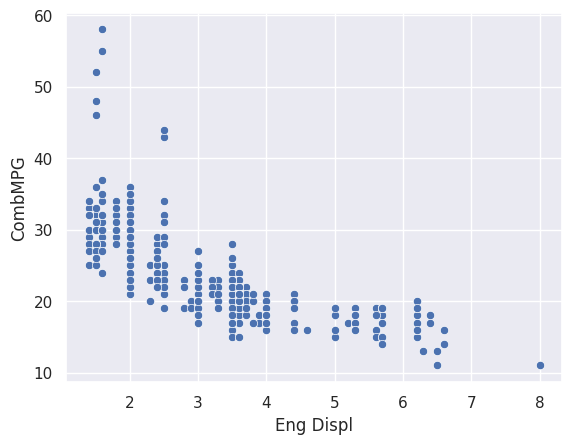

In [17]:
sns.scatterplot(x="Eng Displ", y="CombMPG", data=df)

Seaborn also offers a "jointplot", which combines a scatterplot with histograms on both axes. This lets you visualize both the individual data points and the distribution across both dimensions at the same time.

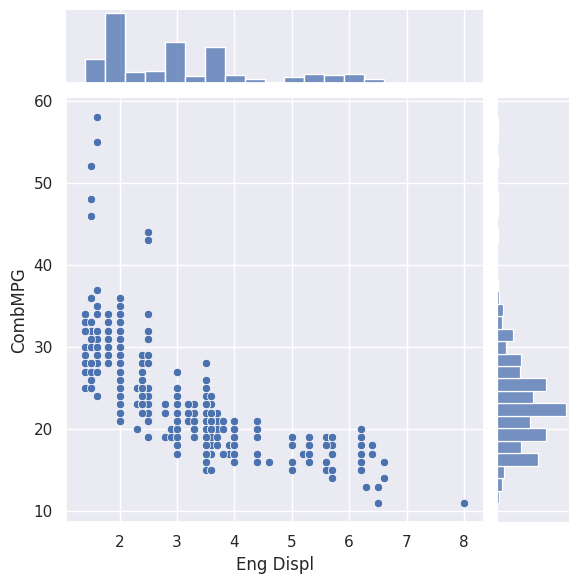

In [18]:
sns.jointplot(x="Eng Displ", y="CombMPG", data=df)

The "lmplot" is a scatterplot, but with a linear regression line computed and overlaid onto the data.

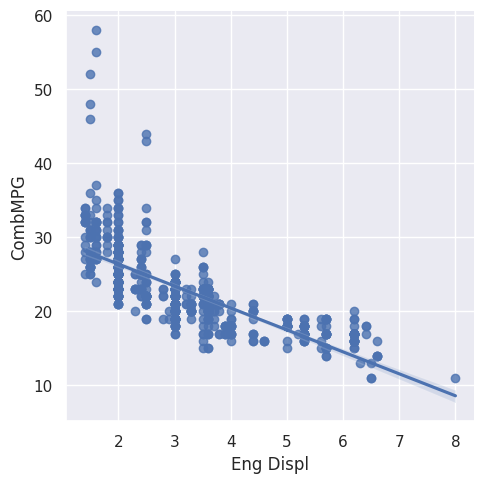

In [19]:
sns.lmplot(x="Eng Displ", y="CombMPG", data=df)

Next, let's look at a "box plot." This is what's called a "box and whiskers" plot, which is useful for visualizing typical values for a given category without getting distracted by outliers. Each box represents the range between the first and third quartiles of the data, with a line representing the median value. The "whiskers" that extend from the box represent the spread of the remainder of the data, apart from clear outliers that are plotted as individual points outside of the whiskers.

As an example, let's look at box plots for each vehicle manufacturer, visualizing the miles-per-gallon ratings across the vehicles they produce. This lets us look at the spread of MPG ratings across all the vehicles each manufacturer offers.

There are a lot of manufacturers, so to make the resulting graph readable we'll increase Seaborn's default figure size, and also use set_xticklabels to rotate the labels 45 degrees.

/tmp/ipython-input-2532244220.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


[Text(0, 0, 'Aston Martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'aston martin'),
 Text(10, 0, 'BMW'),
 Text(11, 0, 'Subaru'),
 Text(12, 0, 'Toyota'),
 Text(13, 0, 'Ford Motor Company'),
 Text(14, 0, 'Mercedes-Benz'),
 Text(15, 0, 'Honda'),
 Text(16, 0, 'Hyundai'),
 Text(17, 0, 'Rolls-Royce'),
 Text(18, 0, 'Volvo'),
 Text(19, 0, 'Kia'),
 Text(20, 0, 'Maserati'),
 Text(21, 0, 'Mitsubishi Motors Co')]

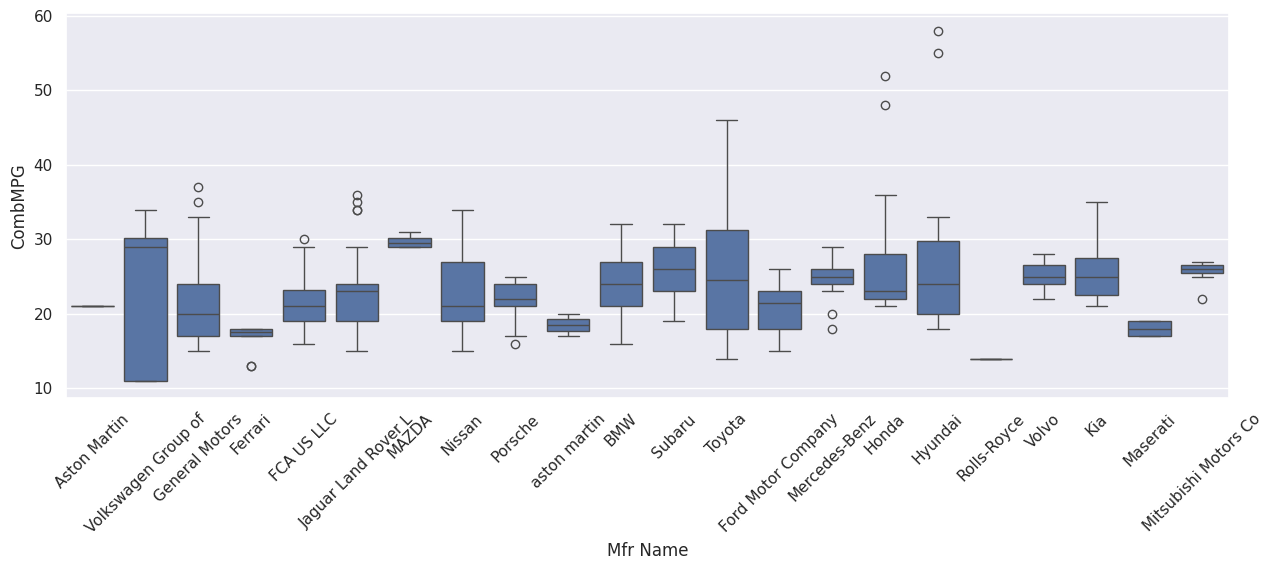

In [20]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Another way to visualize the same data is the "swarm plot." Instead of boxes and whiskers, it plots each individual data point - but does so in such way that groups them together based on their distribution. It makes more sense when you look at it:

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.4% of the points cannot be plac

[Text(0, 0, 'Aston Martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'aston martin'),
 Text(10, 0, 'BMW'),
 Text(11, 0, 'Subaru'),
 Text(12, 0, 'Toyota'),
 Text(13, 0, 'Ford Motor Company'),
 Text(14, 0, 'Mercedes-Benz'),
 Text(15, 0, 'Honda'),
 Text(16, 0, 'Hyundai'),
 Text(17, 0, 'Rolls-Royce'),
 Text(18, 0, 'Volvo'),
 Text(19, 0, 'Kia'),
 Text(20, 0, 'Maserati'),
 Text(21, 0, 'Mitsubishi Motors Co')]

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.4% of the points cannot be plac

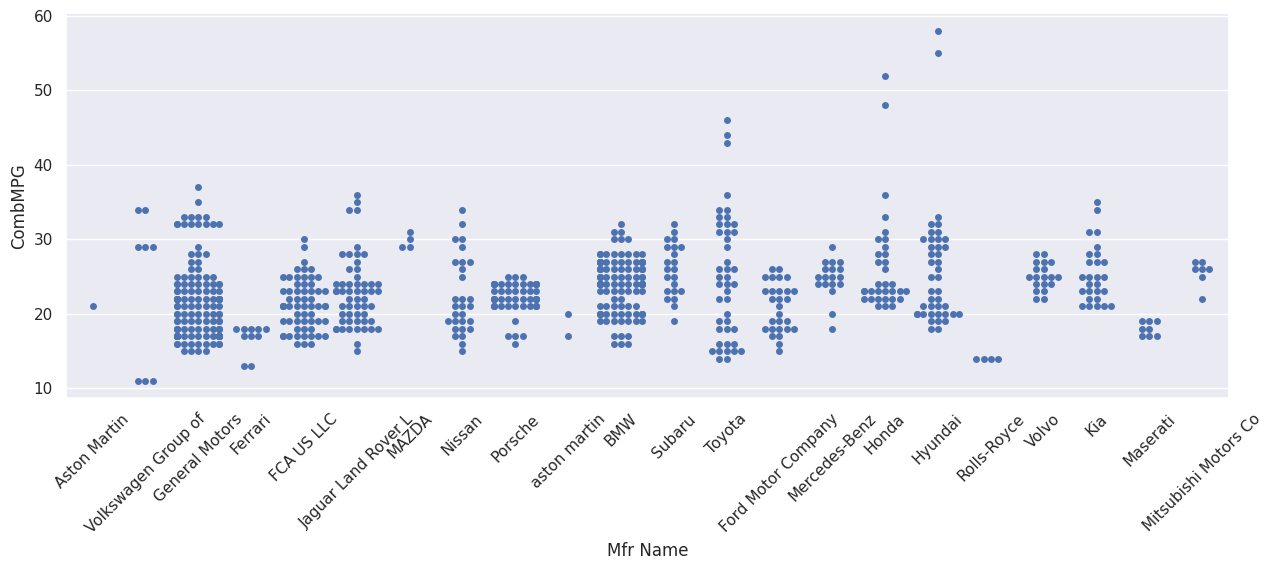

In [21]:
ax=sns.swarmplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Another tool is the "count plot." This is basically the same thing as a histogram, but for categorical data. It lets you count up how many times each given category on the X axis occurs in your data, and plot it. So for example, we can see that General Motors offers more vehicle models than anyone else, with BMW not far behind.

/tmp/ipython-input-2585131678.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


[Text(0, 0, 'Aston Martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'aston martin'),
 Text(10, 0, 'BMW'),
 Text(11, 0, 'Subaru'),
 Text(12, 0, 'Toyota'),
 Text(13, 0, 'Ford Motor Company'),
 Text(14, 0, 'Mercedes-Benz'),
 Text(15, 0, 'Honda'),
 Text(16, 0, 'Hyundai'),
 Text(17, 0, 'Rolls-Royce'),
 Text(18, 0, 'Volvo'),
 Text(19, 0, 'Kia'),
 Text(20, 0, 'Maserati'),
 Text(21, 0, 'Mitsubishi Motors Co')]

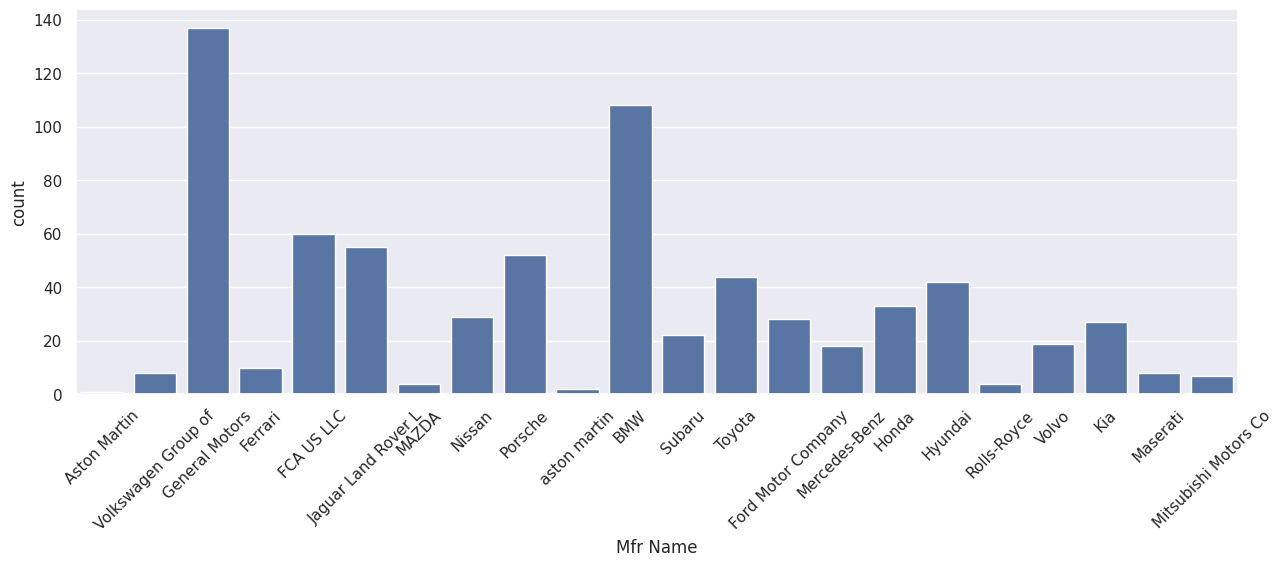

In [22]:
ax=sns.countplot(x='Mfr Name', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Finally, let's look at a heat-map in Seaborn. A heat map allows you to plot tabular, 2D data of some sort, with colors representing the individual values in each cell of the 2D table.

In this example, we'll create a pivot table from our original dataframe, to create a 2D table that contains the average MPG ratings for every combination of number of cylinders and engine displacement.

The resulting heatmap shows all of the engine displacement values along the X axis, and all of the cylinder values along the Y axis. For each cell of the table, the actual average MPG rating for that combination of cylinders and engine displacement is represented not as a number, but as a color that ranges from dark for small values, and light for larger values.

And, this does allow you visualize a clear trend where things get progressively darker as we move from the top-left of the graph to the bottom-right. Which makes sense; higher MPG ratings are associated with lower numbers of cylinders, and lower engine displacment values. By the time we get to an 8-liter 16-cylinder engine, the average MPG is at its worst of about 12, represented by the color black.

This particular graph has a lot of missing data, but the heatmap deals with that gracefully. A 3-cylinder 8-liter engine simply does not exist!

<Axes: xlabel='Eng Displ', ylabel='Cylinders'>

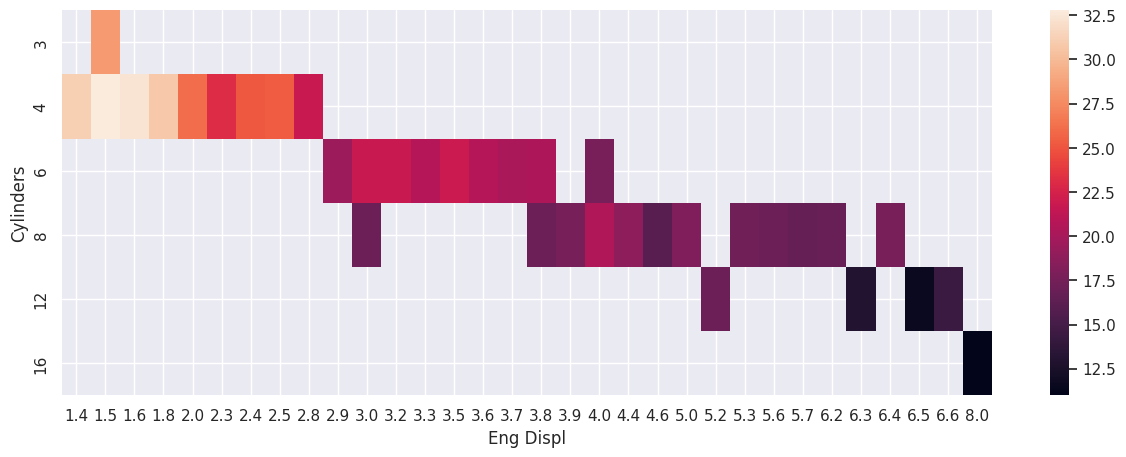

In [23]:
df2 = df.pivot_table(index='Cylinders', columns='Eng Displ', values='CombMPG', aggfunc='mean')
sns.heatmap(df2)

## Exercise

Explore the relationship between the number of gears a car has, and its combined MPG rating. Visualize these two dimensions using a scatter plot, lmplot, jointplot, boxplot, and swarmplot. What conclusions can you draw?

In [32]:
# Cell 1: Load CSV and standardize columns
import os, io
import pandas as pd

# Try local first; if missing, fall back to Colab upload
possible = ["FuelEfficiency.csv", "FuelEfficiency (1).csv", "./FuelEfficiency.csv", "./FuelEfficiency (1).csv"]
path = next((p for p in possible if os.path.exists(p)), None)

if path is None:
    try:
        from google.colab import files
        up = files.upload()  # selecciona FuelEfficiency.csv
        fname = list(up.keys())[0]
        df = pd.read_csv(io.BytesIO(up[fname]))
        print(f"Loaded via upload: {fname}")
    except Exception as e:
        raise FileNotFoundError("Place FuelEfficiency.csv next to the notebook or upload it in Colab.") from e
else:
    df = pd.read_csv(path)
    print(f"Loaded local file: {path}")

print("Original columns:", list(df.columns))

# Standardize likely column names → easier usage
cols_lower = {c.lower(): c for c in df.columns}
def like(*opts):
    for k in opts:
        if k in cols_lower: return cols_lower[k]
    return None

rename = {}
c_gears = like('# gears','gears','num gears','number of gears')
c_comb  = like('combmpg','comb mpg','combined mpg','combined_mpg','mpg (comb)')
c_city  = like('citympg','city mpg','city_mpg')
c_hwy   = like('hwympg','hwy mpg','hwy_mpg','highway mpg')
c_disp  = like('eng displ','engine displacement','displacement','eng_displ')
c_mfr   = like('mfr name','manufacturer','make')
c_cyl   = like('cylinders','cyls')

if c_gears: rename[c_gears] = 'Gears'
if c_comb:  rename[c_comb]  = 'Combined_MPG'
if c_city:  rename[c_city]  = 'City_MPG'
if c_hwy:   rename[c_hwy]   = 'Hwy_MPG'
if c_disp:  rename[c_disp]  = 'Eng_Displ'
if c_mfr:   rename[c_mfr]   = 'Mfr_Name'
if c_cyl:   rename[c_cyl]   = 'Cylinders'

df = df.rename(columns=rename)

# Ensure numeric types on key fields
for col in ['Gears','Combined_MPG','City_MPG','Hwy_MPG','Eng_Displ','Cylinders']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Standardized columns:", list(df.columns))
display(df.head())




Loaded local file: FuelEfficiency.csv
Original columns: ['Mfr Name', 'Carline', 'Eng Displ', 'Cylinders', 'Transmission', 'CityMPG', 'HwyMPG', 'CombMPG', '# Gears']
Standardized columns: ['Mfr_Name', 'Carline', 'Eng_Displ', 'Cylinders', 'Transmission', 'City_MPG', 'Hwy_MPG', 'Combined_MPG', 'Gears']


,Mfr_Name,Carline,Eng_Displ,Cylinders,Transmission,City_MPG,Hwy_MPG,Combined_MPG,Gears
0,Aston Martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


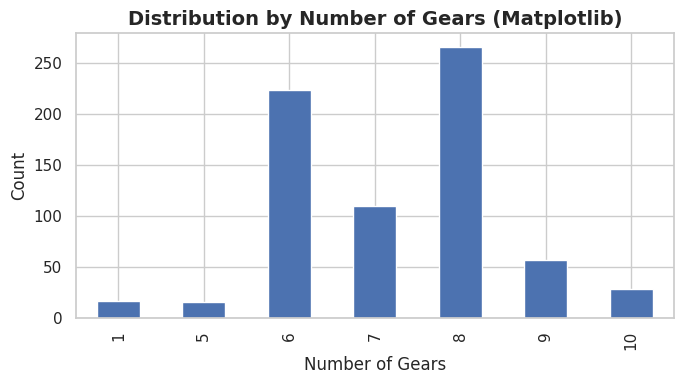

In [33]:
# Cell 2: Basic Matplotlib bar of gear counts (uniform labels/titles)
import matplotlib.pyplot as plt

assert 'Gears' in df.columns, "Column 'Gears' not found. Check Cell 1 mapping."

gear_counts = df['Gears'].value_counts().sort_index()
plt.figure(figsize=(7,4))
gear_counts.plot(kind='bar')
plt.title('Distribution by Number of Gears (Matplotlib)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Gears', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()



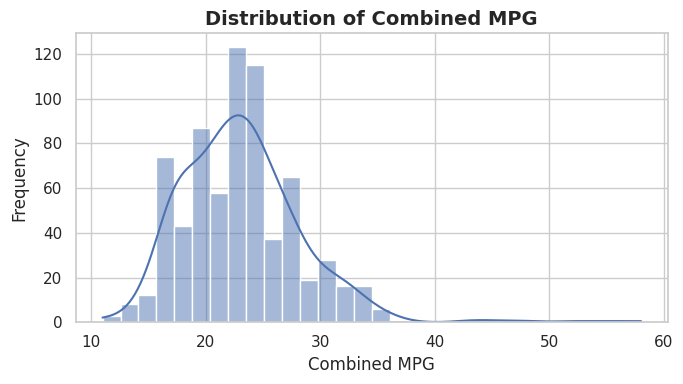

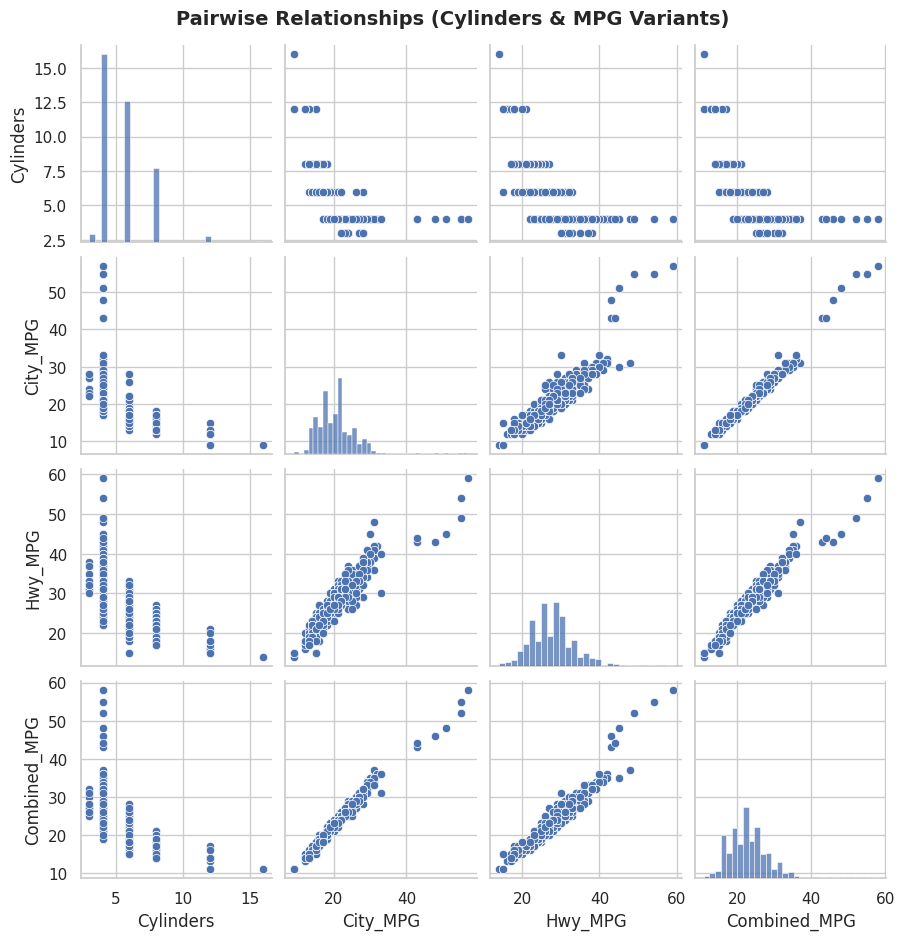

In [34]:
# Cell 3: Seaborn nicer defaults + hist with KDE + pairplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Histogram + KDE for Combined MPG
if 'Combined_MPG' in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df['Combined_MPG'].dropna(), kde=True, bins=30)
    plt.title('Distribution of Combined MPG', fontsize=14, fontweight='bold')
    plt.xlabel('Combined MPG', fontsize=12); plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout(); plt.show()

# Pairplot of MPG variants vs Cylinders (if present)
pair_cols = [c for c in ['Cylinders','City_MPG','Hwy_MPG','Combined_MPG'] if c in df.columns]
if len(pair_cols) >= 2:
    g = sns.pairplot(df[pair_cols].dropna(), height=2.3)
    g.fig.suptitle('Pairwise Relationships (Cylinders & MPG Variants)', y=1.02, fontsize=14, fontweight='bold')
    plt.show()



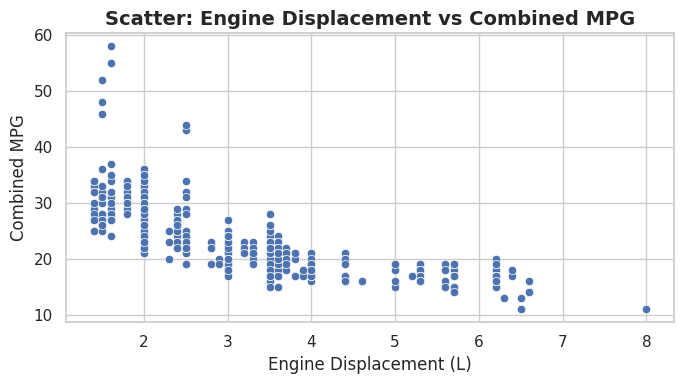

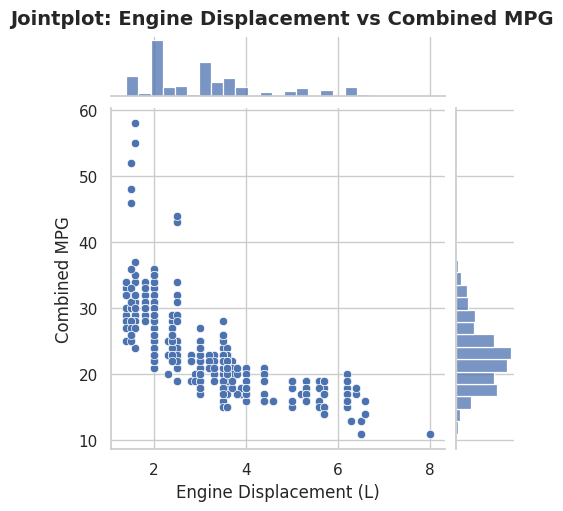

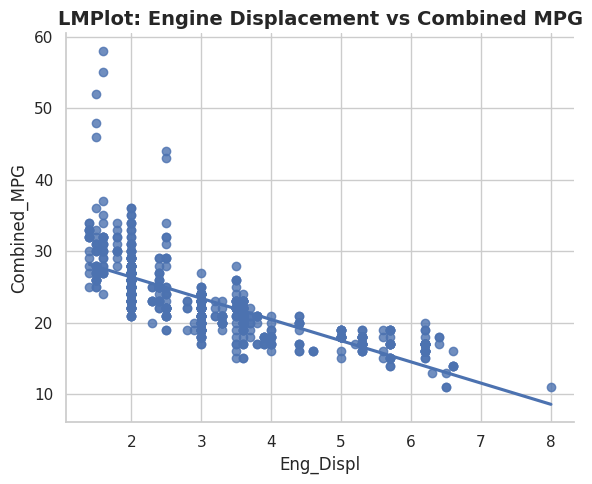

/tmp/ipython-input-1749440134.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


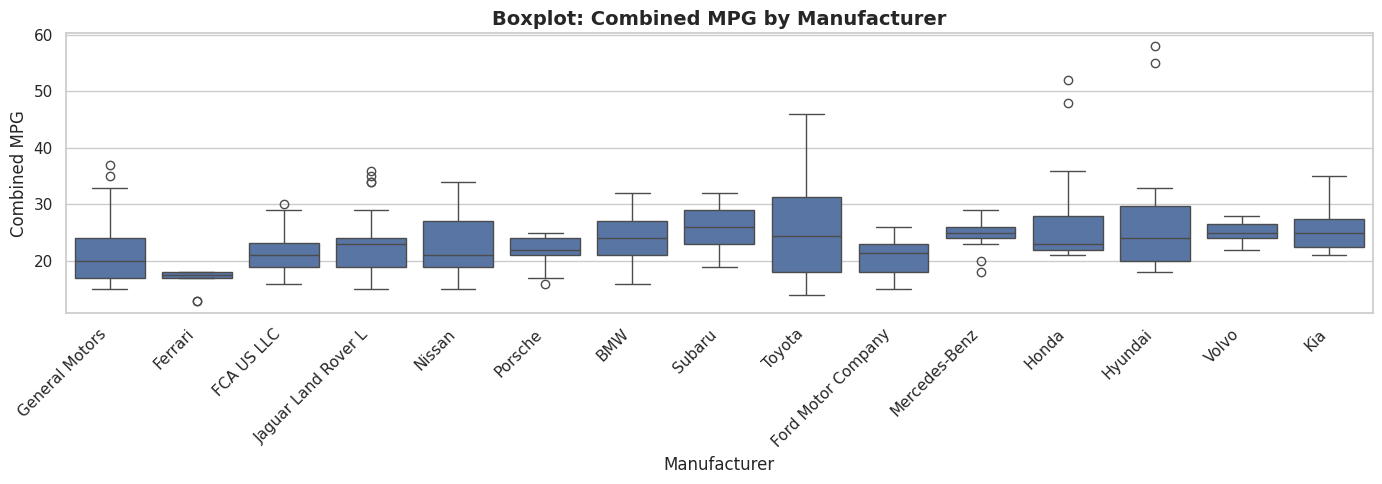

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipython-input-1749440134.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


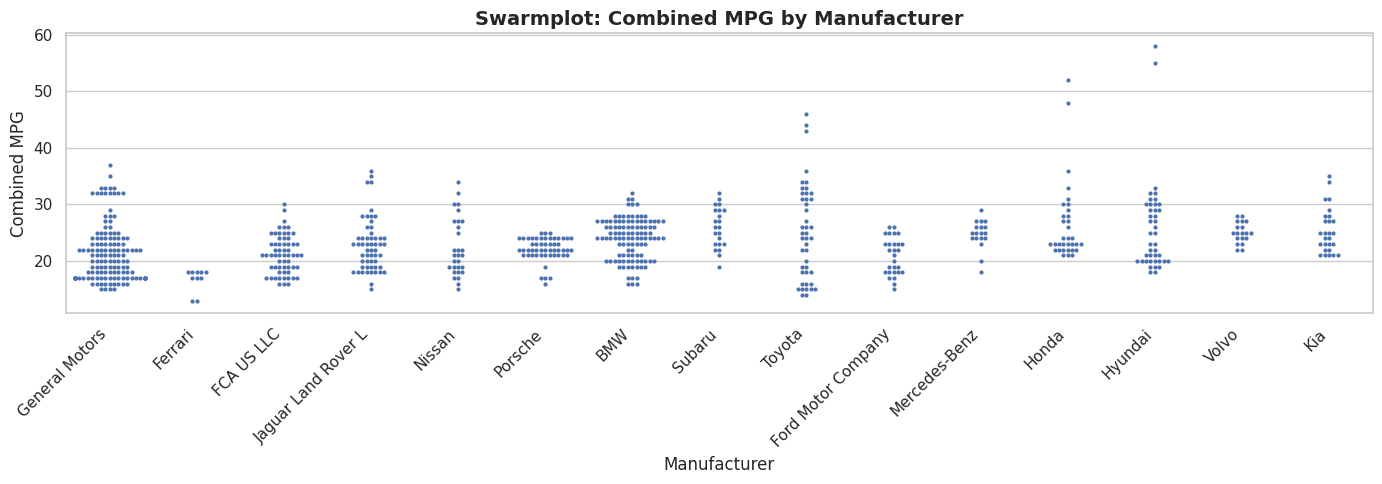

/tmp/ipython-input-1749440134.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


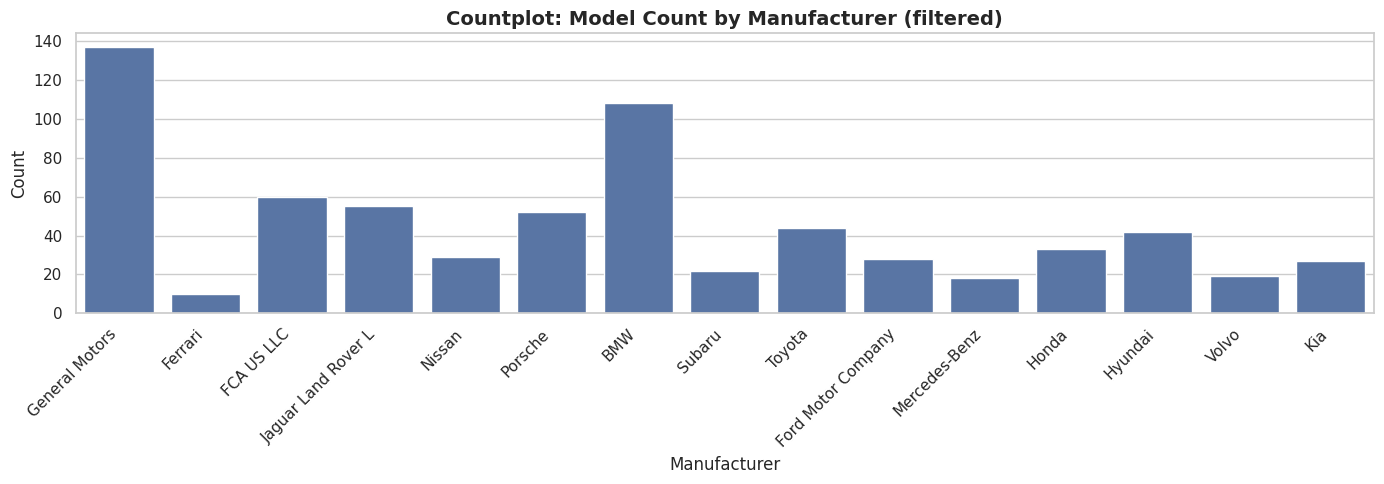

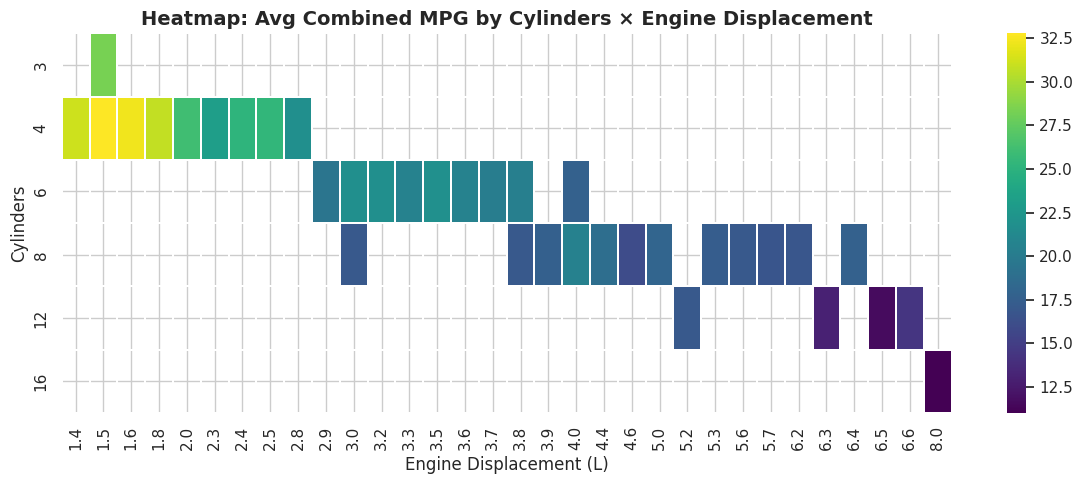

In [35]:
# Cell 4: Examples (Eng_Displ vs Combined_MPG) + Manufacturer plots + Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# 4.1 Scatter / Joint / LM (Eng_Displ vs Combined_MPG)
if {'Eng_Displ','Combined_MPG'}.issubset(df.columns):
    plt.figure(figsize=(7,4))
    sns.scatterplot(data=df, x='Eng_Displ', y='Combined_MPG')
    plt.title('Scatter: Engine Displacement vs Combined MPG', fontsize=14, fontweight='bold')
    plt.xlabel('Engine Displacement (L)', fontsize=12); plt.ylabel('Combined MPG', fontsize=12)
    plt.tight_layout(); plt.show()

    g = sns.jointplot(data=df, x='Eng_Displ', y='Combined_MPG', kind='scatter', height=5,
                      marginal_kws=dict(bins=25, fill=True))
    g.fig.suptitle('Jointplot: Engine Displacement vs Combined MPG', y=1.02, fontsize=14, fontweight='bold')
    g.set_axis_labels('Engine Displacement (L)','Combined MPG')
    plt.show()

    g2 = sns.lmplot(data=df, x='Eng_Displ', y='Combined_MPG', height=5, aspect=1.2, ci=None)
    plt.title('LMPlot: Engine Displacement vs Combined MPG', fontsize=14, fontweight='bold')
    plt.tight_layout(); plt.show()
else:
    print("Skipping Eng_Displ vs Combined_MPG examples (missing columns).")

# 4.2 Box/Swarm/Count por fabricante
if {'Mfr_Name','Combined_MPG'}.issubset(df.columns):
    counts = df['Mfr_Name'].value_counts()
    top = counts[counts >= 10].index  # ajusta el umbral si quieres
    df_mfr = df[df['Mfr_Name'].isin(top)].copy() if len(top) >= 3 else df.copy()

    plt.figure(figsize=(14,5))
    ax = sns.boxplot(x='Mfr_Name', y='Combined_MPG', data=df_mfr)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.title('Boxplot: Combined MPG by Manufacturer', fontsize=14, fontweight='bold')
    plt.xlabel('Manufacturer', fontsize=12); plt.ylabel('Combined MPG', fontsize=12)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(14,5))
    ax = sns.swarmplot(x='Mfr_Name', y='Combined_MPG', data=df_mfr, size=3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.title('Swarmplot: Combined MPG by Manufacturer', fontsize=14, fontweight='bold')
    plt.xlabel('Manufacturer', fontsize=12); plt.ylabel('Combined MPG', fontsize=12)
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(14,5))
    ax = sns.countplot(x='Mfr_Name', data=df_mfr)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.title('Countplot: Model Count by Manufacturer (filtered)', fontsize=14, fontweight='bold')
    plt.xlabel('Manufacturer', fontsize=12); plt.ylabel('Count', fontsize=12)
    plt.tight_layout(); plt.show()
else:
    print("Skipping manufacturer plots (missing Mfr_Name or Combined_MPG).")

# 4.3 Heatmap (Cylinders × Eng_Displ) → avg Combined_MPG
if {'Cylinders','Eng_Displ','Combined_MPG'}.issubset(df.columns):
    tmp = df[['Cylinders','Eng_Displ','Combined_MPG']].dropna().copy()
    tmp['Eng_Displ_round'] = tmp['Eng_Displ'].round(1)
    pivot = tmp.pivot_table(index='Cylinders', columns='Eng_Displ_round',
                            values='Combined_MPG', aggfunc='mean')
    plt.figure(figsize=(12,5))
    sns.heatmap(pivot, cmap='viridis', linewidths=.3, linecolor='white')
    plt.title('Heatmap: Avg Combined MPG by Cylinders × Engine Displacement', fontsize=14, fontweight='bold')
    plt.xlabel('Engine Displacement (L)', fontsize=12); plt.ylabel('Cylinders', fontsize=12)
    plt.tight_layout(); plt.show()
else:
    print("Skipping heatmap (need Cylinders, Eng_Displ, Combined_MPG).")



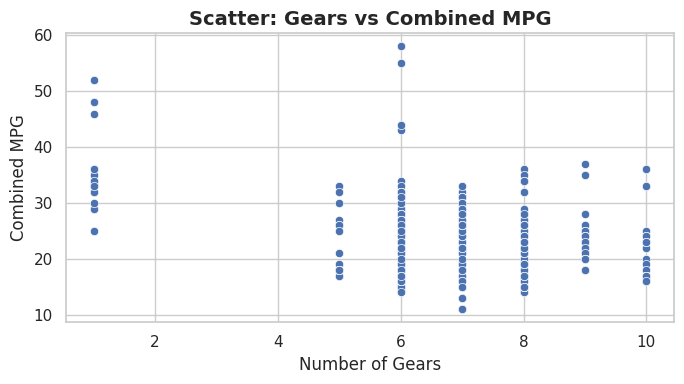

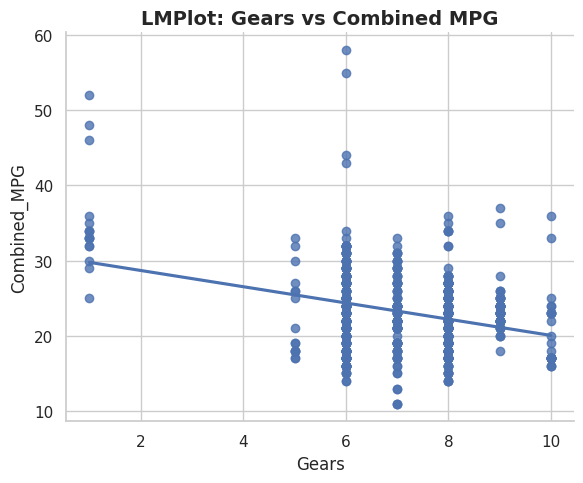

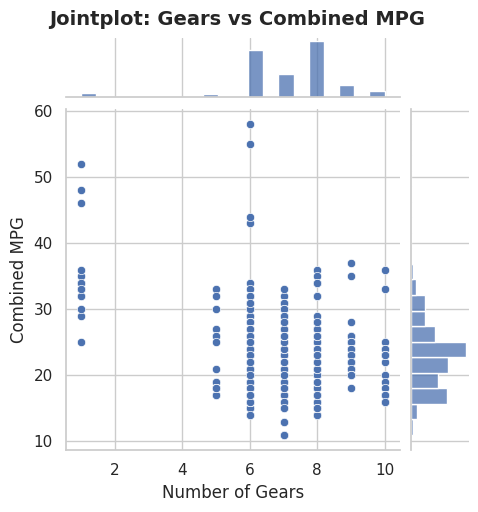

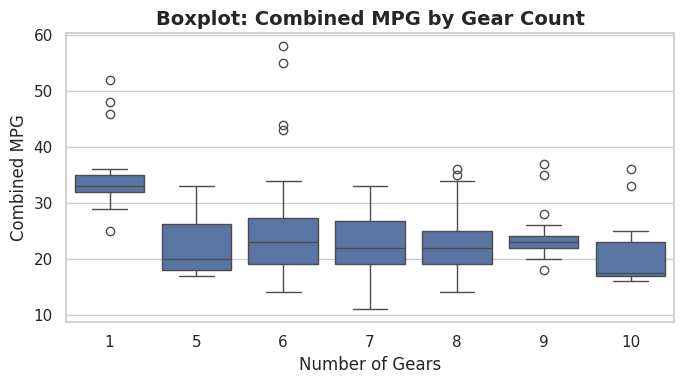

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


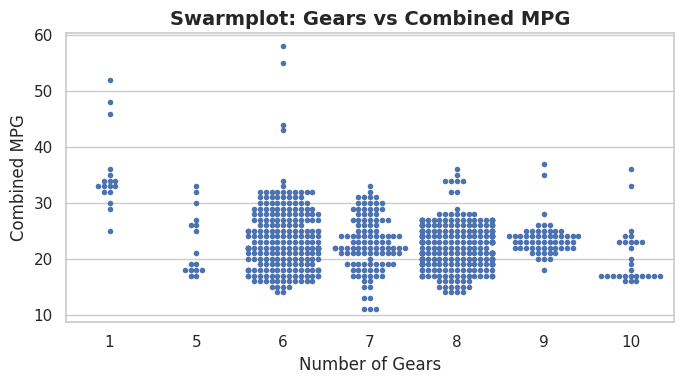


Average Combined MPG by Gear Count:
Gears
1     35.24
5     22.75
6     23.70
7     22.76
8     22.27
9     23.56
10    20.39
Name: Combined_MPG, dtype: float64

Conclusion:
Across plots, higher gear counts generally align with higher combined MPG, likely due to keeping the engine near optimal RPMs. Overlap/outliers show that weight, engine design, and aerodynamics also matter.


In [36]:
# Cell 5 (EXERCISE): Gears vs Combined MPG — scatter, lmplot, jointplot, boxplot, swarmplot + summary
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

assert {'Gears','Combined_MPG'}.issubset(df.columns), \
    "Need 'Gears' and 'Combined_MPG'. Check Cell 1 mapping."

df_plot = df[['Gears','Combined_MPG']].dropna().copy()

# 1) Scatter
plt.figure(figsize=(7,4))
sns.scatterplot(data=df_plot, x='Gears', y='Combined_MPG')
plt.title('Scatter: Gears vs Combined MPG', fontsize=14, fontweight='bold')
plt.xlabel('Number of Gears', fontsize=12); plt.ylabel('Combined MPG', fontsize=12)
plt.tight_layout(); plt.show()

# 2) LMPlot
g = sns.lmplot(data=df_plot, x='Gears', y='Combined_MPG', height=5, aspect=1.2, ci=None)
plt.title('LMPlot: Gears vs Combined MPG', fontsize=14, fontweight='bold')
plt.tight_layout(); plt.show()

# 3) Jointplot (sin warnings)
g2 = sns.jointplot(data=df_plot, x='Gears', y='Combined_MPG', kind='scatter', height=5,
                   marginal_kws=dict(bins=20, fill=True))
g2.fig.suptitle('Jointplot: Gears vs Combined MPG', y=1.02, fontsize=14, fontweight='bold')
g2.set_axis_labels('Number of Gears','Combined MPG')
plt.show()

# 4) Boxplot
plt.figure(figsize=(7,4))
sns.boxplot(data=df_plot, x='Gears', y='Combined_MPG')
plt.title('Boxplot: Combined MPG by Gear Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Gears', fontsize=12); plt.ylabel('Combined MPG', fontsize=12)
plt.tight_layout(); plt.show()

# 5) Swarmplot
plt.figure(figsize=(7,4))
sns.swarmplot(data=df_plot, x='Gears', y='Combined_MPG', size=4)
plt.title('Swarmplot: Gears vs Combined MPG', fontsize=14, fontweight='bold')
plt.xlabel('Number of Gears', fontsize=12); plt.ylabel('Combined MPG', fontsize=12)
plt.tight_layout(); plt.show()

# Summary
print("\nAverage Combined MPG by Gear Count:")
print(df_plot.groupby('Gears')['Combined_MPG'].mean().round(2))

# Optional: tiny, clean conclusion to paste into your report
print("\nConclusion:")
print(
  "Across plots, higher gear counts generally align with higher combined MPG, "
  "likely due to keeping the engine near optimal RPMs. Overlap/outliers show "
  "that weight, engine design, and aerodynamics also matter."
)


**Conclusion**

When analyzing all the plots, a deeper pattern starts to emerge. Cars with more gears don’t necessarily achieve better fuel efficiency; instead, the relationship seems more complex. Vehicles with CVT or fewer gears often perform surprisingly well, suggesting that smooth power delivery and reduced mechanical losses can outweigh the benefits of having multiple gear ratios.

This pattern reminds us that transmission design is just one part of a much larger system. Fuel efficiency depends on how the engine, transmission, and overall vehicle dynamics interact. Elements like aerodynamics, weight distribution, engine tuning, and even driving conditions all shape the final MPG performance.

In the end, the data shows that efficiency isn’t just a result of adding more gears—it’s the outcome of thoughtful engineering choices that balance power, design, and technology to make the most out of every drop of fuel.

My solution is below - no peeking ahead of time!
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>



<AxesSubplot:xlabel='# Gears', ylabel='CombMPG'>

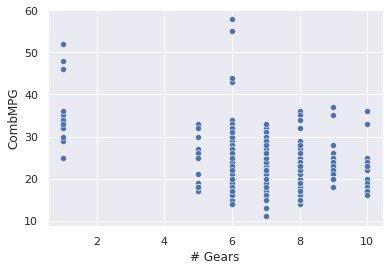

In [ ]:
sns.scatterplot(x='# Gears', y="CombMPG", data=df)

A scatterplot arranges itself into columns when you have ordinal data like the number of gears, but it tells us that there's a pretty wide range of MPG values for each type of gear box, although if you look at where the data points are clustered, you can sort of see a downward trend in MPG as the number of gears increases. But it's subtle.

We also see that there's such a thing as a single gear car. These are "continuously variable transmission" cars, and we can see they typically have high MPG ratings and are therefore quite efficient.

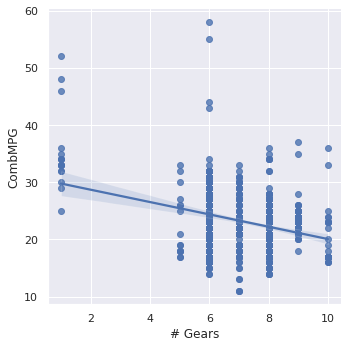

In [ ]:
sns.lmplot(x='# Gears', y="CombMPG", data=df)

The "lmplot" gives us a linear regression of our data overlaid on the graph, and this makes the overall trend of lower MPG's with more gears apparent. More gears isn't better when it comes to efficiency, it seems. We also see the error bars on that regression line, which tells us this trend is probably real and not just the result of randomness in the samples.

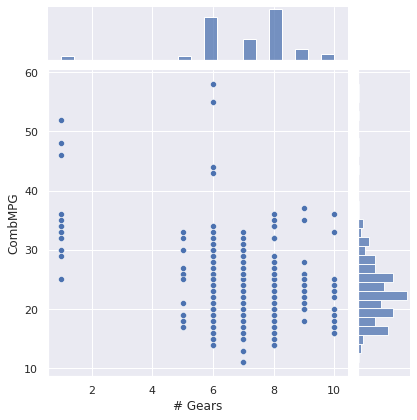

In [ ]:
sns.jointplot(x='# Gears', y="CombMPG", data=df)

The jointplot gives us histograms on each axis, which provides some interesting insights. The most common gear configuration seems to be 8, with 6 closely behind. And MPG ratings seem to roughly follow a bell curve centered at around 22 or so.

<AxesSubplot:xlabel='# Gears', ylabel='CombMPG'>

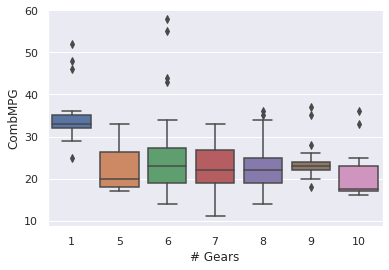

In [ ]:
sns.boxplot(x='# Gears', y="CombMPG", data=df)

The box plot shows us that the range of MPG values we see on each gearbox type aren't as crazily distributed as it seemed at first glance; many of the extreme values are in fact outliers that are best discarded when analyzing the trends. This makes the real relationships easier to see; those continuously variable transmissions with a single gear are really quite good at fuel efficiency (higher MPG's are more efficient). Between 5 and 8 things are roughly the same, but from 8-10 things decline markedly.

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 60.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/e

<AxesSubplot:xlabel='# Gears', ylabel='CombMPG'>

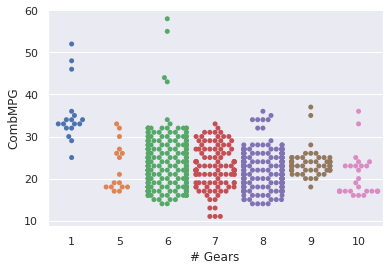

In [ ]:
sns.swarmplot(x='# Gears', y="CombMPG", data=df)

The swarm plot makes it even more apparent that those high MPG outliers are in fact outliers on the 6-gear vehicles; the vast majority of 6-gear vehcles have less than 32 MPG. And the overall trend is perhaps easiest to visualize and understand in this representation.

So, our final verdict: more gears result in worse fuel efficiency. Which strikes me as a little counter-intuitive! But, this is real data from the US Department of Energy for 2019 model year cars, and that's a real conclusion we've drawn, thanks to Seaborn!